In [9]:
#K nearest neighbours implementation from scratch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.linalg import norm

In [15]:
def knn(query_example,x_train,y_train,k):
    distances_and_labels = []
    for index,example in enumerate(x_train):
        distance = (example-query_example)
        distance = norm(distance)
        label = y_train[index]
        distances_and_labels.append((distance,label))
        
    sorted_distances_and_labels = sorted(distances_and_labels)
    k_nearest_distances_and_labels = np.array(sorted_distances_and_labels[:k])
    k_nearest_labels = k_nearest_distances_and_labels[:,-1]
    pred_label = Counter(k_nearest_labels).most_common(1)[0][0]
    return pred_label

In [4]:
path = 'winequality-red.csv'
df = pd.read_csv(path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
y_pred = []
k = 5
for query_example in x_test:
    pred_label = knn(query_example,x_train,y_train,k)
    y_pred.append(pred_label)
    
y_pred = np.array(y_pred)
y_pred = y_pred.astype('uint8')
print(y_pred)

[6 5 5 6 6 6 6 6 5 5 5 5 5 6 6 5 6 5 5 7 5 6 5 6 5 7 6 6 5 5 6 5 5 5 5 6 5
 6 5 6 7 5 5 6 5 6 6 5 5 7 5 5 6 6 5 6 5 6 6 6 5 6 6 7 5 5 5 6 6 6 5 6 6 5
 5 6 7 6 5 5 7 6 5 5 7 5 5 5 6 5 5 6 5 7 5 6 5 6 6 5 6 6 7 5 6 6 5 6 5 5 5
 7 6 6 5 5 5 6 5 5 5 5 7 7 6 7 5 5 5 5 5 6 5 6 5 6 5 6 5 6 5 6 5 6 6 5 6 5
 7 5 5 6 5 5 5 6 6 5 5 5 7 5 6 6 6 6 5 6 6 6 6 6 5 5 7 5 5 5 5 5 5 5 6 6 6
 6 7 5 5 6 5 6 5 7 6 5 6 5 6 6 5 6 6 5 7 6 6 6 7 6 6 6 5 6 5 5 6 7 5 5 5 6
 5 6 5 6 5 6 5 6 6 6 5 7 5 6 5 5 6 5 5 5 6 5 6 5 6 6 5 7 7 6 6 5 6 5 6 5 6
 6 5 6 6 6 7 7 6 5 5 6 5 7 5 6 5 5 6 5 6 5 5 5 6 6 6 5 5 6 5 5 5 5 6 5 6 6
 5 6 6 4 7 7 6 6 7 5 6 5 7 6 5 6 4 6 6 6 6 6 6 5 5 5 5 5 6 5 6 6 6 6 6 6 5
 7 5 5 5 6 5 6 5 6 5 6 6 5 6 5 5 6 7 6 6 6 7 6 6 6 6 6 6 6 6 5 6 7 5 6 5 4
 5 6 7 6 5 6 5 5 5 6 5 6 5 6 5 7 5 5 6 5 5 5 4 6 5 6 6 5 5 6]


In [18]:
print(y_test)

[5 6 5 5 5 6 6 6 7 5 7 6 5 6 6 5 6 5 5 5 6 6 5 6 6 5 6 5 6 5 6 6 5 6 5 5 7
 5 6 5 6 5 5 6 5 6 6 3 5 6 5 6 5 6 6 6 5 6 6 5 5 5 7 6 5 5 6 6 6 5 6 6 6 5
 5 5 6 5 6 5 5 5 5 6 6 6 7 5 5 5 5 5 7 8 5 5 7 6 6 6 6 5 5 8 5 5 6 6 5 5 6
 5 5 6 6 5 7 5 7 6 6 5 5 5 5 6 5 6 5 5 5 5 5 6 5 6 6 8 7 4 6 7 5 6 5 6 6 5
 5 7 6 6 6 5 6 5 6 5 6 5 5 6 5 6 5 5 6 7 5 5 6 7 7 5 5 6 6 5 6 6 5 6 7 6 5
 7 5 5 5 4 3 5 7 5 5 5 5 6 5 5 5 6 5 5 6 5 5 6 6 6 5 5 5 5 7 5 5 6 5 5 5 5
 7 7 5 7 5 5 5 6 6 6 6 7 6 5 6 5 3 6 5 5 6 6 5 6 6 5 5 5 6 5 6 6 6 6 4 7 7
 6 5 6 5 6 5 6 5 5 6 5 5 5 4 7 6 5 6 5 5 5 6 7 5 5 5 4 5 5 5 7 6 5 6 6 7 6
 7 5 6 6 6 5 5 6 6 5 6 6 5 6 6 6 6 5 7 5 5 6 5 6 5 5 5 5 5 7 7 5 5 6 5 6 7
 4 6 7 7 7 6 5 6 6 5 5 6 6 5 4 7 5 6 7 6 5 5 7 6 6 4 5 6 5 5 7 5 6 6 6 6 5
 7 6 6 5 5 5 7 6 5 6 5 5 5 5 6 5 5 4 5 5 7 7 5 7 6 7 4 6 5 5]


In [27]:
accuracy = 0
for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i]):
        accuracy = accuracy + 1

accuracy = accuracy/100
print("Accuracy",accuracy_score)

Accuracy 0.48


In [25]:
#Knearest neighbours using sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
accuracy_score = knn.score(x_test,y_test)
print("Accuracy",accuracy_score)

Accuracy 0.48


In [28]:
#Finding the best k value
nearest_neighbours = np.arange(1,9)
train_accuracy = np.empty(len(nearest_neighbours))
test_accuracy = np.empty(len(nearest_neighbours))

In [30]:
for i,k in enumerate(nearest_neighbours):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    
    temp_train_acc = knn.score(x_train,y_train)
    temp_test_acc = knn.score(x_test,y_test)
    train_accuracy[i] = temp_train_acc
    test_accuracy[i] = temp_test_acc

In [32]:
print(train_accuracy)
print(test_accuracy)

[1.         0.78732277 0.74895746 0.67806505 0.65804837 0.63969975
 0.62385321 0.60550459]
[0.55   0.5075 0.485  0.505  0.4725 0.4925 0.48   0.505 ]


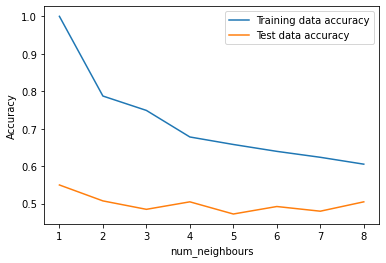

In [33]:
plt.plot(nearest_neighbours,train_accuracy,label = 'Training data accuracy')
plt.plot(nearest_neighbours,test_accuracy,label = 'Test data accuracy')
plt.legend()
plt.xlabel('num_neighbours')
plt.ylabel('Accuracy')
plt.show()